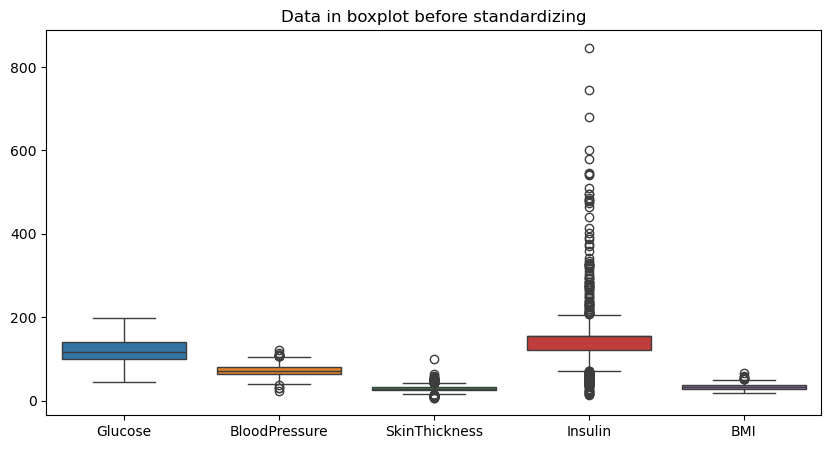

In [18]:
#Predict diabetes using Perceptron
#importing all the necessary packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from  sklearn.preprocessing import StandardScaler

#loading the dataset 
#pointing to the location of the dataset where it has been downloaded.
location=r"C:\Users\anoop\Downloads\archive\diabetes.csv"
data=pd.read_csv(location)

#Raw data need some preprocessing
# first we are replacing all the zeros with the NaN
columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns]=data[columns].replace(0, np.nan)
#Now we are replacing the NaN values with the mean of the column values.
data[columns] = data[columns].fillna(data[columns].mean())

#Viewing the data before scaling using the plt
#setting the figure size for the chart
plt.figure(figsize=(10,5))
sns.boxplot(data=data[columns])
plt.title('Data in boxplot before standardizing')
plt.show()





In [19]:
#just printing the first 5 rows to check the preprocessing has happened to the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [20]:
#calculating accuracy of perceptron model before standardisation for comparison
#Splitting the dataset into features (X) and the target (y) for supervised learning .
X=data.drop(columns='Outcome').values
y=data['Outcome'].values
#splitting the dataset into training and testing dataset.
#20 percent of the dataset is allocated for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#Implementing the Perceptron algorithm, a fundamental machine learning classifier.
#class defenition and initialization 
class PerceptronModel:
    def __init__(self,learning_rate=0.01, iters=1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
#fitting the model-it trains the perceptron model using the X and y.        
    def fit(self,X,y):
        n_sample, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
# Mapping labels to +1 and -1 for the Perceptron algorithm
        y_ = np.where(y>0, 1, -1)   
#Training the model.
#outerloop goes over the number of iteration
#inner loop iterate through each of the sample in the dataset.
        for _ in range(self.iters):
            for i, x_i in enumerate(X):
                l_op  = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(l_op)
                
                if y_[i] * y_predicted <= 0:
                    self.weights += self.lr * y_[i] * x_i
                    self.bias += self.lr * y_[i]
#making predictions. - this takes input feature X and gives predicted lables as outputs                   
    def predict(self,X):
        l_op = np.dot(X,self.weights) + self.bias
        return np.sign(l_op)

#Creating an instance of the Preceptron 
perceptron_instance = PerceptronModel(learning_rate = 0.01, iters=1000)
#Training thr percetron
perceptron_instance.fit(X_train, y_train)


#Using the trained perceptron model to make predictions
y_pred = perceptron_instance.predict(X_test)
#converting the predictions to the binary class label.
y_pred_class = np.where(y_pred>0, 1, 0)
#Calculating the perceptron models accuracy
model_accuracy = np.mean(y_pred_class == y_test)
#printing the accuracy
print(f"Perceptron Model Accuracy before standardisation is : {model_accuracy*100:.2f}%")

Perceptron Model Accuracy before standardisation is : 55.19%


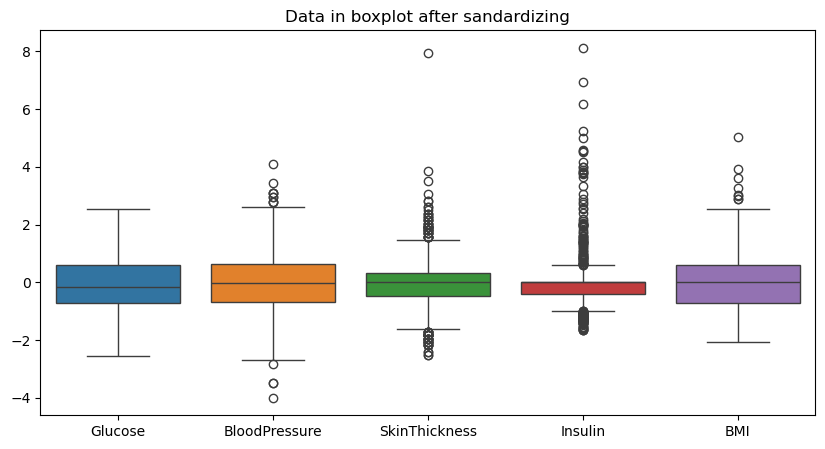

In [4]:
#Now we need to scale the data for the purpose of standardization.
std_scaler = StandardScaler()
features_to_standardize=data.columns[:-1]
#performing the standardization in the seclected columns.
data[features_to_standardize] = std_scaler.fit_transform(data[features_to_standardize])

#Viewing the data after standardization.
plt.figure(figsize=(10,5))
sns.boxplot(data=data[columns])
plt.title('Data in boxplot after sandardizing')
plt.show()



In [5]:
#Splitting the dataset into features (X) and the target (y) for supervised learning .
X=data.drop(columns='Outcome').values
y=data['Outcome'].values


In [6]:
#splitting the dataset into training and testing dataset.
#20 percent of the dataset is allocated for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
#Implementing the Perceptron algorithm, a fundamental machine learning classifier.
#class defenition and initialization 
class PerceptronModel:
    def __init__(self,learning_rate=0.01, iters=1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
#fitting the model-it trains the perceptron model using the X and y.        
    def fit(self,X,y):
        n_sample, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
# Mapping labels to +1 and -1 for the Perceptron algorithm
        y_ = np.where(y>0, 1, -1)   
#Training the model.
#outerloop goes over the number of iteration
#inner loop iterate through each of the sample in the dataset.
        for _ in range(self.iters):
            for i, x_i in enumerate(X):
                l_op  = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(l_op)
                
                if y_[i] * y_predicted <= 0:
                    self.weights += self.lr * y_[i] * x_i
                    self.bias += self.lr * y_[i]
#making predictions. - this takes input feature X and gives predicted lables as outputs                   
    def predict(self,X):
        l_op = np.dot(X,self.weights) + self.bias
        return np.sign(l_op)

In [8]:
#Creating an instance of the Perceptron 
perceptron_instance = PerceptronModel(learning_rate = 0.01, iters=1000)
#Training thr percetron
perceptron_instance.fit(X_train, y_train)


In [9]:
#make test pred
y_test_pred = perceptron_instance.predict(X_test)

In [10]:
#Using the trained perceptron model to make predictions
y_test_pred = perceptron_instance.predict(X_test)
#converting the predictions to the binary class label.
y_test_pred_class = np.where(y_test_pred>0, 1, 0)

In [11]:
#Calculating the perceptron models accuracy for test data set
model_accuracy = np.mean(y_test_pred_class == y_test)
#printing the accuracy
print(f"Perceptron Model Accuracy is : {model_accuracy*100:.2f}%")

Perceptron Model Accuracy is : 76.62%


In [12]:
#printing confusion matrix for test data set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_class)
print(test_conf_matrix)

[[77 22]
 [14 41]]


In [13]:
#printing classification report for test data set
test_class_report = classification_report(y_test, y_test_pred_class)
print(test_class_report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



In [14]:
y_train_pred = perceptron_instance.predict(X_train)
y_train_pred_class = np.where(y_train_pred > 0, 1, 0)

# Calculating perceptron model accuracy for training data
training_accuracy = np.mean(y_train_pred_class == y_train)
print(f"Perceptron train Accuracy is : {training_accuracy*100:.2f}%")

Perceptron train Accuracy is : 73.29%


In [15]:
#printing confusion matrix for train data set
train_conf_matrix = confusion_matrix(y_train, y_train_pred_class)
print(train_conf_matrix)

[[308  93]
 [ 71 142]]


In [16]:
#printing classification report for test data set
train_class_report = classification_report(y_train, y_train_pred_class)
print(train_class_report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       401
           1       0.60      0.67      0.63       213

    accuracy                           0.73       614
   macro avg       0.71      0.72      0.71       614
weighted avg       0.74      0.73      0.74       614



<Figure size 1200x1000 with 0 Axes>

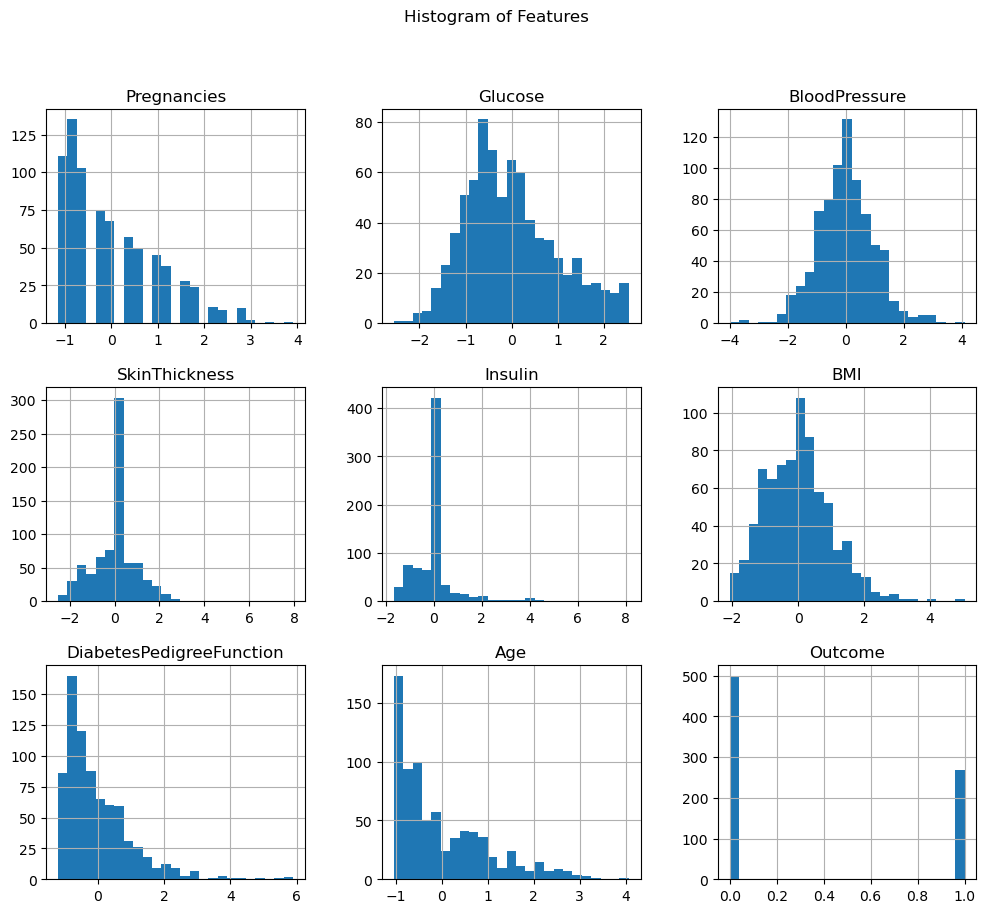

In [17]:
#Plotting the final outcome of the features.
plt.figure(figsize=(12,10))
data.hist(figsize=(12,10),bins=25)
plt.suptitle("Histogram of Features")
plt.show()